# Assignment 1
Name: Jaimon Thypramabil Thomas
<br>StudentID : 29566428

## Section E. Multiclass Perceptron
### Question 6 [Multiclass Perceptron, 20 Marks]
### I. Load Task1D_train.csv and Task1D_test.csv sets.

### Library Used

In [1]:
library(ggplot2) # used for generating plots

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

### Loading Data

In [2]:
#Reading data from csv
task1D_train <- read.csv("Task1D_train.csv")
task1D_test <- read.csv("Task1D_test.csv")
head(task1D_test)

x1,x2,x3,x4,y
4.9,3.0,1.4,0.2,C1
4.6,3.1,1.5,0.2,C1
5.4,3.9,1.7,0.4,C1
5.0,3.4,1.5,0.2,C1
4.9,3.1,1.5,0.1,C1
4.8,3.4,1.6,0.2,C1


In [3]:
#Splitting training and testing data into data and label
train.data <- task1D_train[, -5]
train.label <- task1D_train[, 5]
test.data <- task1D_test[, -5]
test.label <- task1D_test[, 5]

### II. Implement the multiclass perceptron as explained above. Please provide enough comments for your code in your submission.

In [4]:
#function used to predict the class for the current data row
#by finding which class has max value of argmaxk wk . x
getargmax <- function(phi,class.dict){
  max.val = 0 #Used to store the max value
  max.key = -1 #used to store class with max value
  for(each in names(class.dict)){
    temp.val = phi%*%class.dict[[each]] #finding x*w
    if(max.key == -1){
        #initialising value for the first class
          max.key = each
          max.val = temp.val
    }
    else if(temp.val > max.val){
        #updating the max value and its class 
          max.val = temp.val
          max.key = each
    }
  }
  return(max.key)
}

#function used to predict values for all data rows
predict<-function(phi,class.dict){
  predict <-rep(0,nrow(phi))
  for(i in 1:nrow(phi)){
    predict[i] = getargmax(phi[i,],class.dict)
  }
  return(predict)
}

#function used to calulate the average error based on 
#for how many values predicted value is different from the actual value
error.calculator <- function(phi,class.dict,T){
  temp.predictions = predict(phi,class.dict) #used to store all the predicted values
  return(sum(temp.predictions != T)/nrow(phi))
}

#function used to extract errors for multi calss perceptron
multiclass.perceptron <- function(train.data,train.label,eta = 0.01,factor=5){
  
  ## Basis function (Step 1)
  Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0
  
  # Initialization
  epsilon <- 0.001 # Stoping criterion
  tau.max <- 10*nrow(train.data) # Maximum number of iterations
  
  W <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
  
  #intializing weights for each class
  class.labels = unique(train.label) #used to store all the unique classes in the label
  class.dict <- vector(mode="list", length=length(class.labels)) #used to store class and its respective weights
  names(class.dict) <- class.labels #assgining the name of each class into the class.dict
  for(i in 1:length(class.labels)){
    W <- runif(ncol(Phi)) # Random initial values for weight vector
    class.dict[[class.labels[i]]] = W #assigning weights to each respective class 
  }
  #used to store the no of rows in error since we will not be calculating for all iterations
  #instead of that we will be calculating only at the repective factor(like 5th) iteration 
  error.rows = tau.max%/%factor +ifelse(tau.max%%factor==0,0,1) 
  error <- data.frame('tau'=rep(0,error.rows), 'error'=rep(0,error.rows)) 
  
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  train.len <- nrow(train.data)
  # Main Loop (Step 2):
  while(!terminate){
        # resuffling train data and associated labels:
        train.index <- sample(1:train.len, replace = FALSE)
        Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0
        Phi <- Phi[train.index,]
        T <- train.label[train.index]
        for (i in 1:train.len){
              if (terminate) {break}

              predictedVal = getargmax(Phi[i,],class.dict) #used to store the predicted value for current value of x and w
              if(predictedVal != T[i]){
                    #updating weights when predicted value is not equal to the actual value
                    class.dict[[predictedVal]] = class.dict[[predictedVal]] - (eta*Phi[i,]) #updating weights of predicted class
                    class.dict[[T[i]]] = class.dict[[T[i]]] + (eta*Phi[i,])#updating weights of actual class
              }
              if(tau%%factor == 0){
                    #storing error for each factor(like 5th) iteration
                    error[tau/factor,'tau'] <- tau 
                    error[tau/factor,'error'] <- error.calculator(Phi,class.dict,T) 
              }
              tau = tau + 1
              #variable used to calculate the error for all training data with the latest weight 
              error.calculated = error.calculator(Phi,class.dict,T) 
              # recalculate termination Phi
              terminate <- tau >= tau.max | error.calculated <= epsilon 
        }
  }
  return(error)
  
}

### III. Train two multiclass perceptron models on the provided training data by setting the learning rates η to .09 and .01 respectively. Note that all parameter settings stay the same, except the learning rate, when building each model.
### For each model, evaluate the error of the model on the test data, after processing every 5 training data points (also known as a mini-batch). Then, plot the testing errors of two models built based on the learning rates .09 and .01(with different colors) versus the number of mini-batches. Include it in your Jupyter Notebook file for Question 6.
### Now, explain how the testing errors of two models behave differently, as the training data increases, by observing your plot. (Include all your answers in your Jupyter Notebook file.)

In [5]:
set.seed(1234) # to make the results of stochastic methods reproducible
#calculating error for learning rate 0.09 using multiclass perceptron
error09 = multiclass.perceptron(train.data,train.label,0.09,5) 
#calculating error for learning rate 0.01 using multiclass perceptron
error01 = multiclass.perceptron(train.data,train.label,0.01,5)

#### For learning rate 0.09

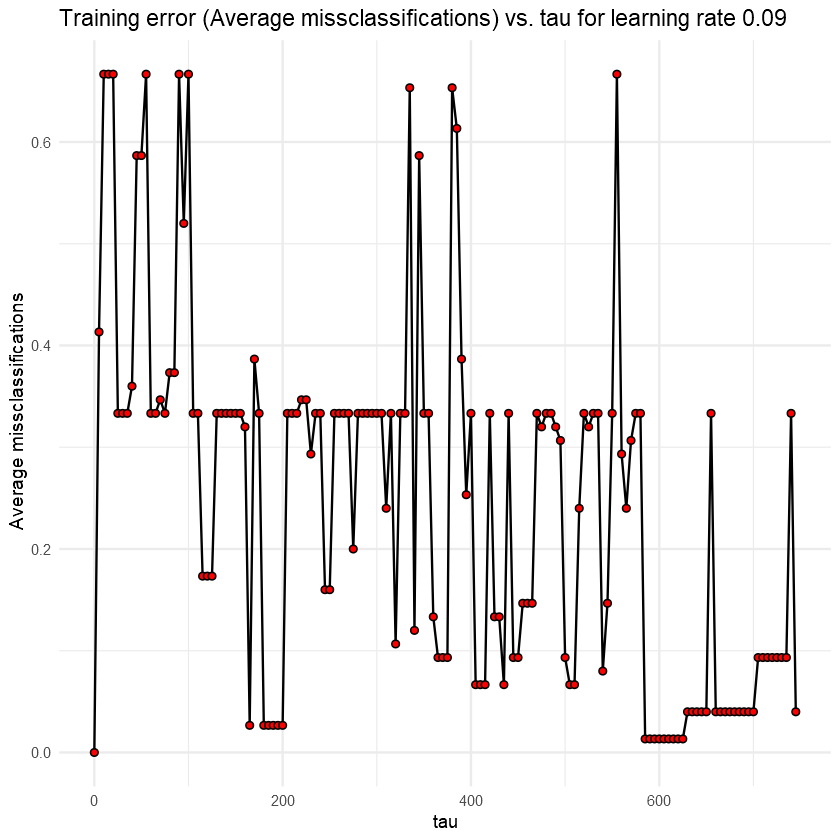

In [6]:
## Training error
ggplot(data=error09,aes(x=tau, y=error)) + geom_line() + geom_point(shape=21, fill='red')  +
labs( title= "Training error (Average missclassifications) vs. tau for learning rate 0.09", y="Average missclassifications",
           x = "tau")+ theme_minimal()

#### For learning rate 0.01

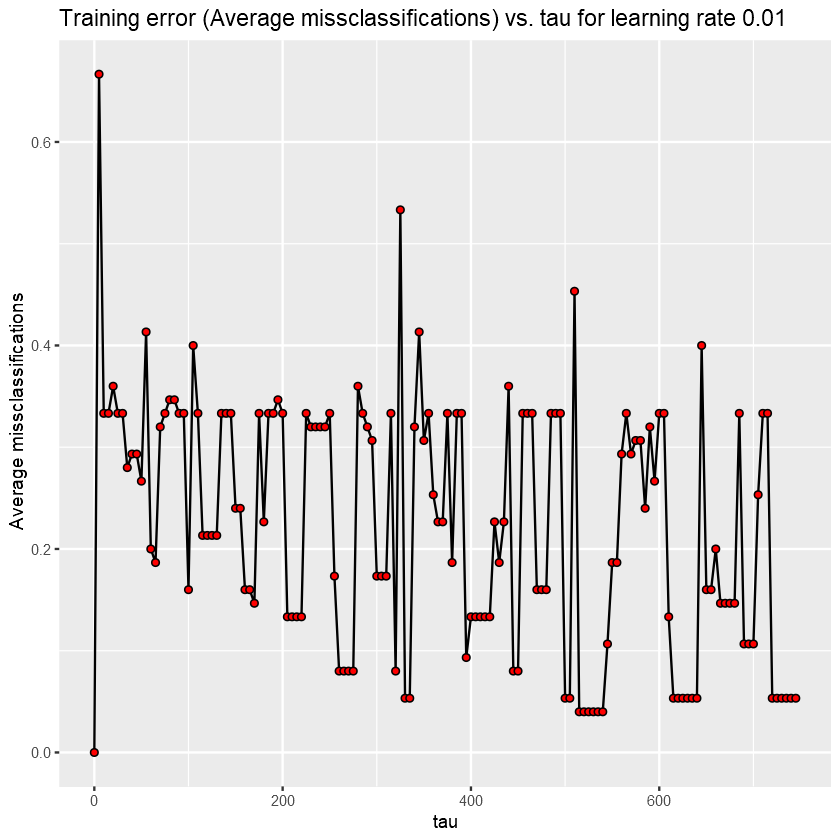

In [7]:
## Training error
ggplot(data=error01,aes(x=tau, y=error)) + geom_line() + geom_point(shape=21, fill='red')  +
labs( title= "Training error (Average missclassifications) vs. tau for learning rate 0.01", y="Average missclassifications",
           x = "tau")

Here we can see that when η =0.09 the amount of fluctuation is much higher than that when the compared to  η =0.01. We can also see that for  η =0.09 approached its best value much faster compared to that of  η =0.01